## Data Visualization and Representation in Python

The Anscombe Quartet and the importance of visualizing data.

Assuming we have collected data on energy consumption across different states in a  country and how much people earn in these states, calculating some summary statistics can give quick insights to which state consumes the most energy, how much energy is used on average in the country, the correlation between people’s earnings and energy consumed in their states and many others. It is essential to note that while these statistics are important and give a description of the dataset, it is not sufficient to use the results alone without plotting the data to obtain a holistic view of the overall distribution. Anscombe Quartet identifies that different datasets can have the same or very identical statistical properties such that they can be labelled the same but when graphed, they are seen to have different distributions. 


### Plotting: Area plots, Histograms, Bar charts, pie charts and scatter charts

There are several types of charts used in data visualisation which are selected based on the data and the information aimed to be communicated. Area plots, histograms, bar charts, pie charts and scatter charts are some of the simple and common graphs used in data analysis. Graphs assist in understanding data when performing EDA and in conveying insights easily.  A line graph is a basic plot that displays the relationship between two variables on each axis by connecting data points together with straight lines. To show magnitude, the segment between the line and the x-axis is filled which results in an area graph. Histograms and bar charts are completely different plots that can be mistaken as similar. The former are charts used to represent the distribution of a group and use adjacent rectangular bars to display the frequency of intervals while the latter are charts that represent categories using equally spaced rectangular bars. 

#### Import Libraries and necessary packages

In [6]:
# Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [8]:
pwd

'C:\\Users\\Sillians\\Downloads\\Practical data science works\\Hamoye internship'

In [11]:
# !pip install jupyter_cms
# %load_ext jupyter_cms

  Stored in directory: C:\Users\Sillians\AppData\Local\pip\Cache\wheels\56\4b\37\7aaf2e292e172f9347290708328fe32ab60005f34b2e5ae7b3
Successfully built jupyter-cms


In [13]:
# import mywb.cookbooks_demo.sklearn_cookbook as skcook
# import mywb.cookbooks_demo.api_cookbook as apicook

In [14]:
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [15]:
# fill in missing values
fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

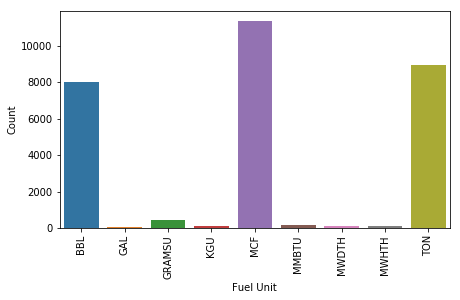

In [16]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')
plt.ylabel('Count')
# plt.legend()
plt.show()

Text(0.5, 1.0, 'Bar Chart')

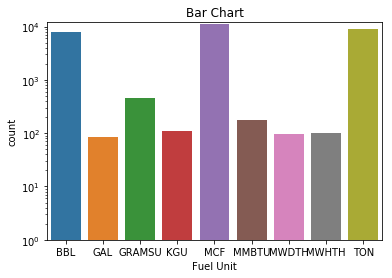

In [17]:
# Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the
# logarithm of the y-axis as follows:

g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')
plt.title('Bar Chart')

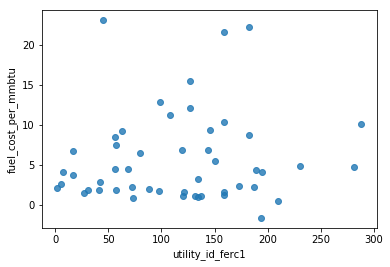

In [18]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

Another common chart is the pie chart which displays a circular representation of the contribution of each proportion of the categories in a dataset. The sum of each proportion is always 100 (percentage). Finally, scatter charts are simple charts similar to the line charts, however, the markers used to represent data points are not joined with lines instead, they are scattered on the charts and easily display the correlation between the variables. 


### Advanced plotting: Kernel Density Estimate plots, box plots and violin plots

A box plot also called a box and whisker plot is a representation of data that displays the distribution and summary statistics such as the median and the interquartile range of the dataset. This plot shows outliers and makes it easy to compare across different categories. 

Although a violin plot is very similar to a box plot such that it  displays the distribution of the data, it provides more information by also showing the probability density of the data rotated on each side. In simple terms, the violin plot displays more information than the box plot however, it is influenced by the sample size. Using Seaborn,  we create a box plot showing the fuel type groups and, the KDE plot of a sample of fuel cost per unit burned in the fuel data:

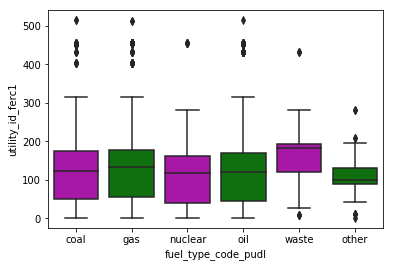

In [19]:
# Import plotting library
import seaborn as sns

# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)

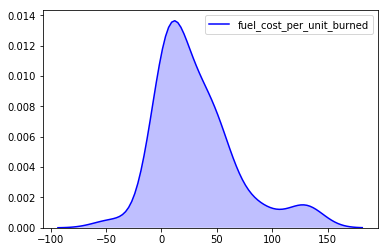

In [20]:
# KDE plot 
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

### Heatmaps and regression plots

A heatmap is a representation of data that uses a spectrum of colours to indicate different values. It gives quick summaries and identifies patterns especially in large datasets. Alternatively, heatmaps can be described as table visualisations where the colour of each cell relates the values. The image below is an example of a heatmap.

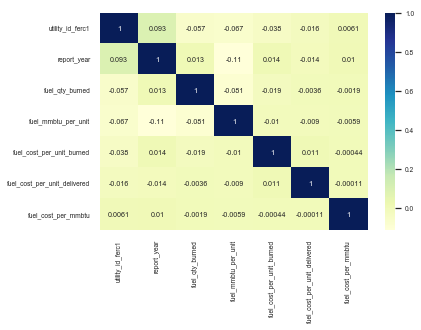

In [21]:
# Select a sample of the dataset
# Compute the correlation matrix
corr = fuel_data.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=0.6)
heat_map = sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()